## Example

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.metrics import silhouette_score
from sklearn.metrics import pairwise_distances
from kmodes.kmodes import KModes
from gower import gower_matrix
from prince import MCA, CA
from sklearn.metrics import silhouette_samples
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from pandas.plotting import parallel_coordinates
%matplotlib inline

In [2]:
data = pd.read_csv('JuanPanda1-Merged.csv')
# data = data.reset_index()
data = data.drop(columns=["Unnamed: 13", "Unnamed: 14", "Unnamed: 15"])
data

,gender,age,residence,daily allowance,attendance,dismissal,travel,breaks,transportation,foodCampus,Q1,Q2,Q3
0,Female,22,Imus,₱200 to ₱500,1 to 2 times a week,"Early Afternoon (e.g. 1:00PM, 3:00PM)",Less than 500m (approx. distance from Gate 3 t...,1 break,"Commute (e.g. jeep, bus, tricycle)",Yes,Food Square,"Rice meal, Beverages (e.g., fruit/milk shake, ...",₱100 to ₱200
1,Male,22,Bacoor,₱100 to ₱200,3 to 4 times a week,"Late Afternoon (e.g. 4:00PM, 5:00PM)",Less than 500m (approx. distance from Gate 3 t...,1 break,"Commute (e.g. jeep, bus, tricycle)",Yes,Food Square,"Rice meal, Water",₱100 to ₱200
2,Male,22,Silang,₱100 to ₱200,1 to 2 times a week,"Late Afternoon (e.g. 4:00PM, 5:00PM)",Less than 500m (approx. distance from Gate 3 t...,1 break,"Personal transportation (e.g. car, motorcycle)",No,Orange house,Rice meal,Below ₱100
3,Male,22,Bacoor,₱100 to ₱200,3 to 4 times a week,"Early Afternoon (e.g. 1:00PM, 3:00PM)",Less than 500m (approx. distance from Gate 3 t...,1 break,"Commute (e.g. jeep, bus, tricycle)",Yes,Food Square,"Rice meal, Finger foods (e.g., fries, takoyaki...",₱100 to ₱200
4,Male,25,General Trias,₱200 to ₱500,3 to 4 times a week,Noon (12:00PM),More than 1km,2-3 breaks,"Commute (e.g. jeep, bus, tricycle)",No,Savemore,Rice meal,₱100 to ₱200
...,...,...,...,...,...,...,...,...,...,...,...,...,...
113,Male,23,Imus,Below ₱100,1 to 2 times a week,Morning (e.g. 10:00AM),Less than 500m (approx. distance from Gate 3 t...,2-3 breaks,"Commute (e.g. jeep, bus, tricycle)",No,Waltermart,Rice meal,Below ₱100
114,Male,21,Bacoor,Below ₱100,1 to 2 times a week,Noon (12:00PM),Around 1km (approx. distance from Gate 3 to Fo...,1 break,"Commute (e.g. jeep, bus, tricycle)",Yes,Milas' Canteen,"Finger foods (e.g., fries, takoyaki, etc)",Below ₱100
115,Male,21,Imus,Below ₱100,1 to 2 times a week,Morning (e.g. 10:00AM),Less than 500m (approx. distance from Gate 3 t...,1 break,"Commute (e.g. jeep, bus, tricycle)",Yes,Food Square,Rice meal,Below ₱100
116,Female,19,Dasma,"₱500 to ₱1,000",1 to 2 times a week,Noon (12:00PM),Around 1km (approx. distance from Gate 3 to Fo...,2-3 breaks,"Personal transportation (e.g. car, motorcycle)",No,SM Dasma,"Rice meal, Beverages (e.g., fruit/milk shake, ...",₱200 to ₱500


In [3]:
null_data = data[data.isnull().any(axis=1)]
null_data

,gender,age,residence,daily allowance,attendance,dismissal,travel,breaks,transportation,foodCampus,Q1,Q2,Q3


Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 41, cost: 607.0
Run 1, iteration: 2/100, moves: 3, cost: 607.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 27, cost: 620.0
Run 2, iteration: 2/100, moves: 28, cost: 608.0
Run 2, iteration: 3/100, moves: 0, cost: 608.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 13, cost: 614.0
Run 3, iteration: 2/100, moves: 0, cost: 614.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 4, iteration: 1/100, moves: 17, cost: 631.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 5, iteration: 1/100, moves: 12, cost: 655.0
Run 5, iteration: 2/100, moves: 18, cost: 620.0
Run 5, iteration: 3/100, moves: 22, cost: 609.0
Run 5, iteration: 4/100, moves: 9, cost: 609.0
Best run was number 1
Init: 

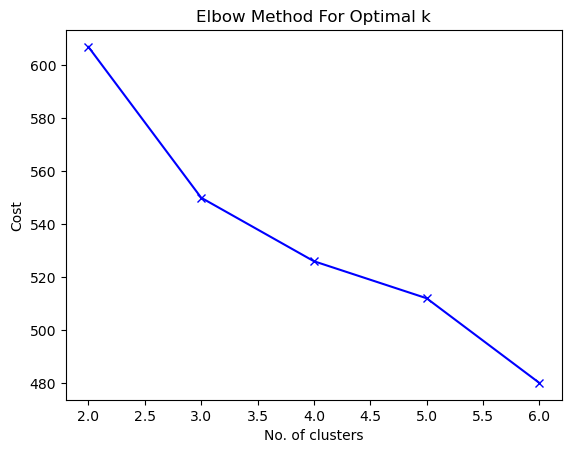

In [4]:
# Elbow curve to find optimal K
cost = []
K = range(2,7)
for num_clusters in list(K):
    kmode = KModes(n_clusters=num_clusters, init = "random", n_init = 5, verbose=1)
    kmode.fit_predict(data)
    cost.append(kmode.cost_)
    
plt.plot(K, cost, 'bx-')
plt.xlabel('No. of clusters')
plt.ylabel('Cost')
plt.title('Elbow Method For Optimal k')
plt.show()

In [5]:
# Initialize an empty list to store the silhouette scores
silhouette_scores = []

# Define range of n_clusters and n_init values to try
n_clusters_range = range(2, 11)  # Try values from 2 to 10
n_init_range = range(5, 16)  # Try values from 5 to 15

In [6]:
# for n_clusters in n_clusters_range:
#     for n_init in n_init_range:
#         # Create a KMeans instance with the current values of n_clusters and n_init
#         kmode = KModes(n_clusters=n_clusters, init = "Huang", n_init=n_init, verbose=1)
        
#         # Fit the KMeans model to your data
#         kmode.fit(data)
              

#         # Calculate the Gower similarity matrix
#         gower_dist = gower_matrix(data)

#         # Calculate the silhouette samples
#         silhouette_samples = silhouette_samples(gower_dist, kmode.labels_)

#         # Calculate the average silhouette score
#         silhouette_avg = np.mean( data, kmode.labels_)
        
#         # Append the silhouette score to the list
#         silhouette_scores.append((n_clusters, n_init, silhouette_avg))

In [7]:
# Building the model with 3 clusters
kmode = KModes(n_clusters=2, init = "Huang", n_init = 5, verbose=1)
clusters = kmode.fit_predict(data)
clusters

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 36, cost: 613.0
Run 1, iteration: 2/100, moves: 3, cost: 613.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 7, cost: 614.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 26, cost: 617.0
Run 3, iteration: 2/100, moves: 11, cost: 617.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 4, iteration: 1/100, moves: 10, cost: 614.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 5, iteration: 1/100, moves: 16, cost: 623.0
Run 5, iteration: 2/100, moves: 3, cost: 623.0
Best run was number 1


array([1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 1, 1, 0, 0, 1, 1], dtype=uint16)

In [8]:
data.insert(0, "Cluster", clusters, True)
# data

In [9]:
data.to_csv('JuanPanda-Output.csv', index=False)

### MODEL EVALUATION

In [10]:
df = pd.read_csv('JuanPanda-Output.csv')
df.head()

,Cluster,gender,age,residence,daily allowance,attendance,dismissal,travel,breaks,transportation,foodCampus,Q1,Q2,Q3
0,1,Female,22,Imus,₱200 to ₱500,1 to 2 times a week,"Early Afternoon (e.g. 1:00PM, 3:00PM)",Less than 500m (approx. distance from Gate 3 t...,1 break,"Commute (e.g. jeep, bus, tricycle)",Yes,Food Square,"Rice meal, Beverages (e.g., fruit/milk shake, ...",₱100 to ₱200
1,0,Male,22,Bacoor,₱100 to ₱200,3 to 4 times a week,"Late Afternoon (e.g. 4:00PM, 5:00PM)",Less than 500m (approx. distance from Gate 3 t...,1 break,"Commute (e.g. jeep, bus, tricycle)",Yes,Food Square,"Rice meal, Water",₱100 to ₱200
2,0,Male,22,Silang,₱100 to ₱200,1 to 2 times a week,"Late Afternoon (e.g. 4:00PM, 5:00PM)",Less than 500m (approx. distance from Gate 3 t...,1 break,"Personal transportation (e.g. car, motorcycle)",No,Orange house,Rice meal,Below ₱100
3,0,Male,22,Bacoor,₱100 to ₱200,3 to 4 times a week,"Early Afternoon (e.g. 1:00PM, 3:00PM)",Less than 500m (approx. distance from Gate 3 t...,1 break,"Commute (e.g. jeep, bus, tricycle)",Yes,Food Square,"Rice meal, Finger foods (e.g., fries, takoyaki...",₱100 to ₱200
4,1,Male,25,General Trias,₱200 to ₱500,3 to 4 times a week,Noon (12:00PM),More than 1km,2-3 breaks,"Commute (e.g. jeep, bus, tricycle)",No,Savemore,Rice meal,₱100 to ₱200


In [11]:
# Calculate the Gower similarity matrix
gower_dist = gower_matrix(data)

In [12]:
# Calculate the silhouette samples
silhouette_samples = silhouette_samples(gower_dist, kmode.labels_)


In [13]:
# Calculate the average silhouette score
silhouette_avg = np.mean(silhouette_samples)

In [14]:
print(silhouette_avg)

0.21043582


### PLOT

In [15]:
one_hot_data = pd.get_dummies(data)

In [16]:
mca = MCA(n_components=2)
mca_coordinates = mca.fit_transform(one_hot_data)

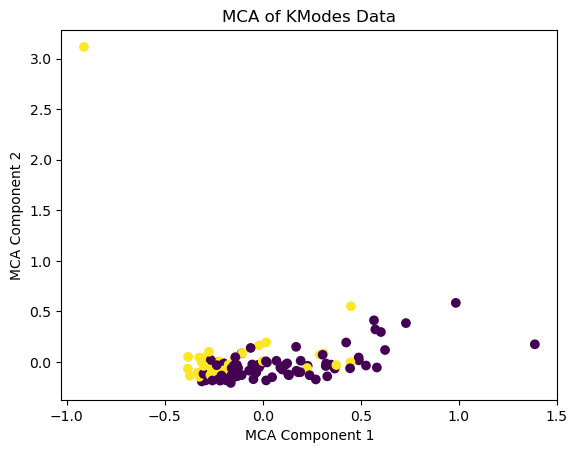

In [17]:
# Plot the MCA coordinates
plt.scatter(mca_coordinates.iloc[:, 0], mca_coordinates.iloc[:, 1], c=clusters)
plt.xlabel('MCA Component 1')
plt.ylabel('MCA Component 2')
plt.title('MCA of KModes Data')
plt.show()

# Approach #1: Train on Separate Clusters
Since the dataset already has its own clusters (inside vs outside), we can train those invidually.

In [10]:
dataset = pd.read_csv('JuanPanda1-FullDataset.csv')
dataset = data.reset_index()
dataset

,index,Cluster,gender,age,residence,daily allowance,attendance,dismissal,travel,breaks,transportation,foodCampus,Q1,Q2,Q3
0,0,0,Female,22,Imus,₱200 to ₱500,1 to 2 times a week,"Early Afternoon (e.g. 1:00PM, 3:00PM)",Less than 500m (approx. distance from Gate 3 t...,1 break,"Commute (e.g. jeep, bus, tricycle)",Yes,Food Square,"Rice meal, Beverages (e.g., fruit/milk shake, ...",₱100 to ₱200
1,1,0,Male,22,Bacoor,₱100 to ₱200,3 to 4 times a week,"Late Afternoon (e.g. 4:00PM, 5:00PM)",Less than 500m (approx. distance from Gate 3 t...,1 break,"Commute (e.g. jeep, bus, tricycle)",Yes,Food Square,"Rice meal, Water",₱100 to ₱200
2,2,0,Male,22,Silang,₱100 to ₱200,1 to 2 times a week,"Late Afternoon (e.g. 4:00PM, 5:00PM)",Less than 500m (approx. distance from Gate 3 t...,1 break,"Personal transportation (e.g. car, motorcycle)",No,Orange house,Rice meal,Below ₱100
3,3,0,Male,22,Bacoor,₱100 to ₱200,3 to 4 times a week,"Early Afternoon (e.g. 1:00PM, 3:00PM)",Less than 500m (approx. distance from Gate 3 t...,1 break,"Commute (e.g. jeep, bus, tricycle)",Yes,Food Square,"Rice meal, Finger foods (e.g., fries, takoyaki...",₱100 to ₱200
4,4,1,Male,25,General Trias,₱200 to ₱500,3 to 4 times a week,Noon (12:00PM),More than 1km,2-3 breaks,"Commute (e.g. jeep, bus, tricycle)",No,Savemore,Rice meal,₱100 to ₱200
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113,113,1,Male,23,Imus,Below ₱100,1 to 2 times a week,Morning (e.g. 10:00AM),Less than 500m (approx. distance from Gate 3 t...,2-3 breaks,"Commute (e.g. jeep, bus, tricycle)",No,Waltermart,Rice meal,Below ₱100
114,114,0,Male,21,Bacoor,Below ₱100,1 to 2 times a week,Noon (12:00PM),Around 1km (approx. distance from Gate 3 to Fo...,1 break,"Commute (e.g. jeep, bus, tricycle)",Yes,Milas' Canteen,"Finger foods (e.g., fries, takoyaki, etc)",Below ₱100
115,115,0,Male,21,Imus,Below ₱100,1 to 2 times a week,Morning (e.g. 10:00AM),Less than 500m (approx. distance from Gate 3 t...,1 break,"Commute (e.g. jeep, bus, tricycle)",Yes,Food Square,Rice meal,Below ₱100
116,116,0,Female,19,Dasma,"₱500 to ₱1,000",1 to 2 times a week,Noon (12:00PM),Around 1km (approx. distance from Gate 3 to Fo...,2-3 breaks,"Personal transportation (e.g. car, motorcycle)",No,SM Dasma,"Rice meal, Beverages (e.g., fruit/milk shake, ...",₱200 to ₱500


## Food Inside the Campus

In [11]:
data_in = dataset.loc[dataset['foodCampus'] == 'Yes']
data_in = data_in.drop(columns=['level_0', 'index', 'B1', 'B2', 'B3'])
data_in

KeyError: "['level_0', 'B1', 'B2', 'B3'] not found in axis"

In [ ]:
# Elbow curve to find optimal K
data = data_in
cost = []
K = range(1,5)
for num_clusters in list(K):
    kmode = KModes(n_clusters=num_clusters, init = "random", n_init = 5, verbose=1)
    kmode.fit_predict(data)
    cost.append(kmode.cost_)
    
plt.plot(K, cost, 'bx-')
plt.xlabel('No. of clusters')
plt.ylabel('Cost')
plt.title('Elbow Method For Optimal k')
plt.show()

In [ ]:
# Building the model with 3 clusters
kmode = KModes(n_clusters=1, init = "random", n_init = 5, verbose=1)
clusters = kmode.fit_predict(data)
clusters

In [ ]:
data.insert(0, "Cluster", clusters, True)
data